<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/MedMNIST_Multi_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tensor_reloaded_multi_task_med_mnist_path = kagglehub.competition_download('tensor-reloaded-multi-task-med-mnist')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


## Load the data and Structure

In [ ]:
dataset_path = '/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/'
print("Dataset structure:", os.listdir(dataset_path))

# Define a function to load, preprocess, and train a model for each dataset
def process_dataset(data_path, dataset_name):
    # Load the dataset
    dataset = np.load(data_path + dataset_name)

Dataset structure: ['tissuemnist.npz', 'organamnist.npz', 'octmnist.npz', 'organsmnist.npz', 'retinamnist.npz', 'pneumoniamnist.npz', 'breastmnist.npz', 'organcmnist.npz', 'dermamnist.npz', 'pathmnist.npz', 'bloodmnist.npz']


In [ ]:
# Load the dataset
dataset = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/tissuemnist.npz')

# Check the keys in the dataset (what data is available)
print("Keys in the dataset:", dataset.keys())

Keys in the dataset: KeysView(NpzFile '/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/tissuemnist.npz' with keys: train_images, train_labels, val_images, val_labels, test_images...)


## Visualize a Samples

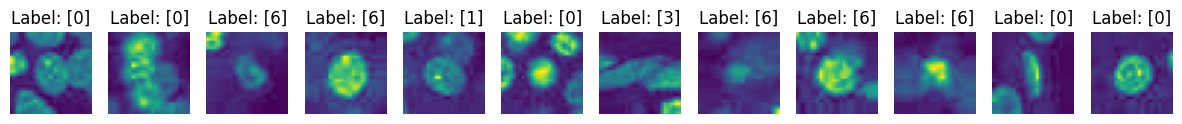

In [ ]:
# Load the training, validation, and test images and labels
train_images = dataset['train_images']
train_labels = dataset['train_labels']
val_images = dataset['val_images']
val_labels = dataset['val_labels']
test_images = dataset['test_images']
test_labels = dataset['test_labels']

def visualize_samples(images, labels, num_samples=12):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

# Visualize the first 12 samples
visualize_samples(train_images, train_labels)

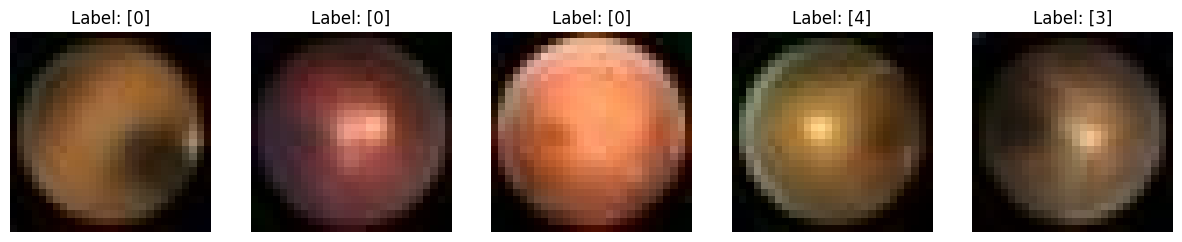

In [ ]:
file_name = 'retinamnist.npz'
dataset = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/retinamnist.npz')

# Load the training, validation, and test images and labels
train_images = dataset['train_images']
train_labels = dataset['train_labels']
val_images = dataset['val_images']
val_labels = dataset['val_labels']
test_images = dataset['test_images']
test_labels = dataset['test_labels']

def visualize_samples(images, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

# Visualize the first 5 samples
visualize_samples(train_images, train_labels)

## Preprocess the Data

In [ ]:
# Load one of the MedMNIST datasets
data_path = '/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/octmnist.npz/'

# Print the keys in the .npz file
print("Keys in the .npz file:", dataset.keys())

# Load the training, validation, and test images and labels
train_images = dataset['train_images']
train_labels = dataset['train_labels']
val_images = dataset['val_images']
val_labels = dataset['val_labels']
test_images = dataset['test_images']
test_labels = dataset['test_labels']

# Inspect the shape of the data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Keys in the .npz file: KeysView(NpzFile '/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/retinamnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...)
Train images shape: (1080, 28, 28, 3)
Train labels shape: (1080, 1)
Validation images shape: (120, 28, 28, 3)
Validation labels shape: (120, 1)
Test images shape: (400, 28, 28, 3)
Test labels shape: (400, 1)


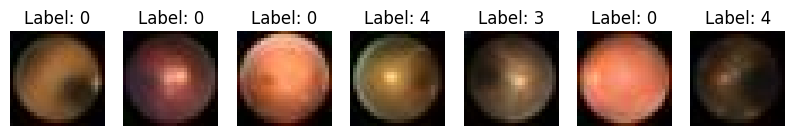

In [ ]:
# Visualizing some sample images from the training set
num_samples = 7

plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i][0]}")
    plt.axis('off')
plt.show()

In [ ]:
# Check label distribution in the training set
train_labels_flat = train_labels.flatten()
val_labels_flat = val_labels.flatten()
test_labels_flat = test_labels.flatten()

print("Training label distribution:")
print(np.unique(train_labels_flat, return_counts=True))

print("Validation label distribution:")
print(np.unique(val_labels_flat, return_counts=True))

print("Test label distribution:")
print(np.unique(test_labels_flat, return_counts=True))

Training label distribution:
(array([0, 1, 2, 3, 4], dtype=uint8), array([486, 128, 206, 194,  66]))
Validation label distribution:
(array([0, 1, 2, 3, 4], dtype=uint8), array([54, 12, 28, 20,  6]))
Test label distribution:
(array([0, 1, 2, 3, 4], dtype=uint8), array([174,  46,  92,  68,  20]))


In [ ]:
# Checking the image shape and type
print("Image shape (each image):", train_images.shape[1:])
print("Image type (each image):", type(train_images[0]))

# Checking the range of values for the pixel data (0-255 before normalization)
print("Pixel values range: Min =", train_images.min(), ", Max =", train_images.max())

Image shape (each image): (28, 28, 3)
Image type (each image): <class 'numpy.ndarray'>
Pixel values range: Min = 0 , Max = 255


In [ ]:
# Check for missing values (NaN or Inf) in the images and labels
print("Missing values in training images:", np.isnan(train_images).any())
print("Missing values in training labels:", np.isnan(train_labels).any())

# Check for corrupted data (e.g., shape mismatch)
assert train_images.shape[0] == train_labels.shape[0], "Mismatch between number of images and labels"
assert val_images.shape[0] == val_labels.shape[0], "Mismatch between number of validation images and labels"
assert test_images.shape[0] == test_labels.shape[0], "Mismatch between number of test images and labels"

Missing values in training images: False
Missing values in training labels: False


In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the images (Scale pixel values to [0, 1])
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# # One-hot encode the labels
# num_classes = len(np.unique(train_labels))  # Number of classes in the dataset
# train_labels = to_categorical(train_labels, num_classes=num_classes)
# val_labels = to_categorical(val_labels, num_classes=num_classes)
# test_labels = to_categorical(test_labels, num_classes=num_classes)

# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=4)
val_labels_one_hot = to_categorical(val_labels, num_classes=4)
test_labels_one_hot = to_categorical(test_labels, num_classes=4)


In [ ]:
from tensorflow.keras import layers, models

# Define the model using Keras Sequential API
    model = Sequential()

    # Add convolutional layers, ReLU activations, and pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the dense layers
    model.add(Flatten())

    # Add fully connected layers with dropout for regularization
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with dynamic number of classes

model.summary()

IndentationError: unexpected indent (<ipython-input-27-c2976ce46c57>, line 4)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load the dataset
dataset = np.load('/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/octmnist.npz')

# Load images and labels for training, validation, and test sets
train_images = dataset['train_images']
train_labels = dataset['train_labels']
val_images = dataset['val_images']
val_labels = dataset['val_labels']
test_images = dataset['test_images']
test_labels = dataset['test_labels']

# Normalize the images (Scale pixel values to [0, 1])
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=4)
val_labels_one_hot = to_categorical(val_labels, num_classes=4)
test_labels_one_hot = to_categorical(test_labels, num_classes=4)

# Print the shape of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels_one_hot.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels_one_hot.shape}")

# Define a simple CNN model
model = models.Sequential()

# Add Conv2D layers (convolutional layers)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(layers.Dense(4, activation='softmax'))  # Output layer with 10 classes (adjust as needed)

# Print model summary
model.summary()

Train images shape: (97477, 28, 28)
Train labels shape: (97477, 4)
Validation images shape: (10832, 28, 28)
Validation labels shape: (10832, 4)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,772 (628.02 KB)

 Trainable params: 160,772 (628.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels_one_hot))


Epoch 1/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.6778 - loss: 0.8243 - val_accuracy: 0.8191 - val_loss: 0.5167
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8283 - loss: 0.4895 - val_accuracy: 0.8556 - val_loss: 0.4171
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8488 - loss: 0.4244 - val_accuracy: 0.8500 - val_loss: 0.4242
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8632 - loss: 0.3862 - val_accuracy: 0.8728 - val_loss: 0.3762
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8751 - loss: 0.3532 - val_accuracy: 0.8786 - val_loss: 0.3480
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8814 - loss: 0.3385 - val_accuracy: 0.8881 - val_loss: 0.3275
Epoch 7/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8893 - loss: 0.3144 - val_accuracy: 0.8849 - val_loss: 0.3395
Epoch 8/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8950 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - loss: 0.9339
Test Loss: 0.8991, Test Accuracy: 0.70%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Visualize a batch of images
def visualize_batch(data_loader):
    images, labels = next(iter(data_loader))
    # Plot a few samples from the batch
    fig, axes = plt.subplots(1, 12, figsize=(15, 5))
    for i in range(12):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

visualize_batch(train_loader)

## Define the Model

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_and_process_dataset(file_path, num_classes_dict):
    """
    Load and process dataset from .npz file.

    Args:
    - file_path (str): Path to the .npz file.
    - num_classes_dict (dict): A dictionary with dataset names as keys and number of classes as values.

    Returns:
    - train_images (numpy.ndarray): Training images.
    - train_labels (numpy.ndarray): One-hot encoded training labels.
    - val_images (numpy.ndarray): Validation images.
    - val_labels (numpy.ndarray): One-hot encoded validation labels.
    - test_images (numpy.ndarray): Test images.
    - test_labels (numpy.ndarray): One-hot encoded test labels.
    """
    dataset_name = os.path.basename(file_path).replace('.npz', '')
    num_classes = num_classes_dict[dataset_name]

    # Load the .npz file
    data = np.load(file_path)

    # Extract and one-hot encode labels
    train_images, train_labels = data['train_images'], to_categorical(data['train_labels'], num_classes)
    val_images, val_labels = data['val_images'], to_categorical(data['val_labels'], num_classes)
    test_images, test_labels = data['test_images'], to_categorical(data['test_labels'], num_classes)

    return train_images, train_labels, val_images, val_labels, test_images, test_labels


In [ ]:
# Define number of classes for each dataset
num_classes_dict = {
    'pathmnist': 9,
    'dermamnist': 7,
    'octmnist': 4,
    'pneumoniamnist': 2,
    'retinamnist': 5,
    'breastmnist': 2,
    'bloodmnist': 8,
    'tissuemnist': 8,
    'organamnist': 11,
    'organcmnist': 11,
    'organsmnist': 11
}

# Path to datasets
dataset_path = '/kaggle/input/tensor-reloaded-multi-task-med-mnist/data/'

# Initialize dictionaries to store processed data
train_images_dict = {}
train_labels_dict = {}
val_images_dict = {}
val_labels_dict = {}
test_images_dict = {}
test_labels_dict = {}

# Loop through each dataset file
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.npz'):
        file_path = os.path.join(dataset_path, file_name)
        dataset_name = file_name.replace('.npz', '')

        # Process the dataset
        train_images, train_labels, val_images, val_labels, test_images, test_labels = load_and_process_dataset(
            file_path, num_classes_dict
        )

        # Store processed data
        train_images_dict[dataset_name] = train_images
        train_labels_dict[dataset_name] = train_labels
        val_images_dict[dataset_name] = val_images
        val_labels_dict[dataset_name] = val_labels
        test_images_dict[dataset_name] = test_images
        test_labels_dict[dataset_name] = test_labels

# Example: Access processed data
print(f"PathMNIST Train Images Shape: {train_images_dict['pathmnist'].shape}")
print(f"PathMNIST Train Labels Shape: {train_labels_dict['pathmnist'].shape}")


PathMNIST Train Images Shape: (89996, 28, 28, 3)
PathMNIST Train Labels Shape: (89996, 9)


In [ ]:
def preprocess_images(images):
    # Normalize the images
    images = images / 255.0  # Scale pixel values to [0, 1]

    # Ensure images have a single channel
    if len(images.shape) == 3:  # Add channel dimension if missing
        images = images[..., np.newaxis]
    elif images.shape[-1] == 3:  # If RGB, convert to grayscale
        images = np.mean(images, axis=-1, keepdims=True)

    return images

In [ ]:
train_images = preprocess_images(train_images)
val_images = preprocess_images(val_images)
test_images = preprocess_images(test_images)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    """
    Create a CNN model with a shared backbone and a task-specific classification head.

    Args:
    - input_shape (tuple): Shape of the input images (height, width, channels).
    - num_classes (int): Number of classes for the task (dataset).

    Returns:
    - model (tensorflow.keras.Model): The CNN model.
    """
    inputs = layers.Input(shape=input_shape)

    # Shared Backbone: Convolutional Layers
    x = layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Task-specific Output Layer (for multi-class classification)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Example: Create model for 'pathmnist' dataset
input_shape = (28, 28, 1)  # Grayscale image (28x28 pixels, 1 channel)
num_classes = 9  # For 'pathmnist' dataset
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,417 (943.04 KB)

 Trainable params: 241,417 (943.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    """
    Create a CNN model with a shared backbone and a task-specific classification head.

    Args:
    - input_shape (tuple): Shape of the input images (height, width, channels).
    - num_classes (int): Number of classes for the task (dataset).

    Returns:
    - model (tensorflow.keras.Model): The CNN model.
    """
    inputs = layers.Input(shape=input_shape)

    # Shared Backbone: Convolutional Layers
    x = layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Task-specific Output Layer (for multi-class classification)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

def train_model_for_dataset(dataset_name, train_images, train_labels, val_images, val_labels):
    """
    Train the model for a specific dataset.

    Args:
    - dataset_name (str): The name of the dataset.
    - train_images (numpy.ndarray): Training images.
    - train_labels (numpy.ndarray): One-hot encoded training labels.
    - val_images (numpy.ndarray): Validation images.
    - val_labels (numpy.ndarray): One-hot encoded validation labels.
    """
    print(f"Training model for {dataset_name}...")

    # Create the model for the current dataset
    model = create_model(input_shape=(28, 28, 1), num_classes=train_labels.shape[1])

    # Compile the model before training
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=64)

    # Save the model for future use
    model.save(f"{dataset_name}_model.h5")

# Example: Train the model for PathMNIST
train_model_for_dataset('pathmnist', train_images_dict['pathmnist'], train_labels_dict['pathmnist'],
                        val_images_dict['pathmnist'], val_labels_dict['pathmnist'])


Training model for pathmnist...
Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv2d_12" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 28, 28, 3)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=uint8)
  • training=True
  • mask=None